### Introduction


**Probelm Statement:** Make a classifier which takes in a job description and gives the department name for it.
*   Use a neural network model
*   Make use of a pre-trained Word Embeddings (example: Word2Vec, GloVe, etc.)
*   Calculate the accuracy on a test set (data not used to train the model)

**Problem Solving Approach:** 
_Provide a brief description of steps you followed for solving this problem_
1. Read the data from document_deparments.csv and similiarly created a data frame with {Document ID','description} as columns. Read Json file from data/docs and mapped the 'description' with 'Document ID' in newly created data frame(i.e desc). Initially read data(i.e deparment) and newly created data frame is merged on the basis of Document ID as data. Then after remove the rows where description is null. 
2. Obtained the deparment distribution from data and ploted a bar plot of departments. from the analysis wehave obtained 27 unique departments.
3. Text(i.e description) is preprocessed by removing stop words,punctuations,bad symbols etc. and text cleaning is applied to clean the data for analysis. Python library such as keras and nltk is imported for neural network model builiding and evalution.We got 54% accuracy on test data i can imporve more by hyper tuning the parameters. i have also ploted the accuracy and loss graph for train and test data set.

### Part I: Text Preprocessing

_Include all text preprocesing steps like processing of json,csv files & data cleaning in this part._

Import neccessary packages in below cell

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import nltk
import string
import re
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
#nlp = spacy.load('en_core_web_sm')
from nltk.tokenize import sent_tokenize, word_tokenize
import json
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup

Using TensorFlow backend.


In [2]:
department=pd.read_csv('data/document_departments.csv')
department.head()
desc = pd.DataFrame(columns=['Document ID','description'])
for filename in os.listdir('data/docs'):
    with open('data/docs/'+filename) as f:
        # Read each line of the file
        file_data=json.load(f)
        description=file_data['jd_information']['description']
        desc=desc.append(pd.Series([filename.split('.')[0], description], index=desc.columns), ignore_index=True)
desc.head()
desc['Document ID']=desc['Document ID'].astype(int)
department['Document ID']=department['Document ID'].astype(int)
data = pd.merge(department, desc, on='Document ID')
data.head()
data.shape
# Removing row where description is null 
data['description'].replace('', np.nan, inplace=True)
data.dropna(subset=['description'], inplace=True)
data.shape

(745, 3)

### Part II: Exploratoty Data Analysis

_Include EDA steps like finding distribution of Departments in this part, you may also use plots for EDA._

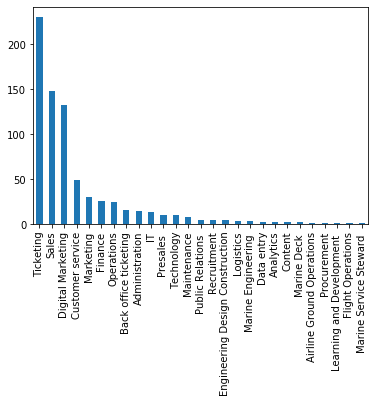

In [5]:
data.Department.value_counts().plot.bar()
plt.show()

In [6]:
data.Department.nunique()

27

### Part III: Modelling & Evaluation

_Include all model prepration & evaluation steps in this part._

In [8]:
def print_plot(index):
    example = data[data.index == index][['description', 'Department']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Department:', example[1])
print_plot(10)
import re
data = data.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('nbsp', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
data['description'] = data['description'].apply(clean_text)
data['description'] = data['description'].str.replace('\d+', '')
MAX_NB_WORDS = 10000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 150
# This is fixed.
EMBEDDING_DIM = 50

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data['description'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = tokenizer.texts_to_sequences(data['description'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)
Y = pd.get_dummies(data.Department).values
print('Shape of label tensor:', Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(27, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
epochs = 8
batch_size = 16

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
print('Test set Loss:')
model.evaluate(X_test,Y_test)[0]
print('Test set Accuracy:')
model.evaluate(X_test,Y_test)[1]


talent hunters hiring tours travel company position store managerfranchiseelocations hyderabad vijaywada nellore belgaumdepartment franchisee job requirements candidate specificationmiddot experience selling products ie group fit packages international amp domestic middot knowledge companyrsquo productstotal expminimum   yrs experience travel amp tourismmiddot education qualification graduateshould travel tourism industrysalary ctc max lpanotice periodimmediate joinees preferred interested send cv email idspinki gmailcom hrthms gmailcom call numbers   regards pinky
Department: Finance
Found 6840 unique tokens.
Shape of data tensor: (745, 150)
Shape of label tensor: (745, 27)
(670, 150) (670, 27)
(75, 150) (75, 27)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 150, 50)           500000    
________________________________________________________

C:\Users\IndiaAdmin\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 603 samples, validate on 67 samples
Epoch 1/8
603/603 [==============================] - ETA: 6:18 - loss: 3.2986 - accuracy: 0.0000e+ - ETA: 3:11 - loss: 3.2947 - accuracy: 0.0625   - ETA: 2:11 - loss: 3.2945 - accuracy: 0.06 - ETA: 1:38 - loss: 3.2929 - accuracy: 0.09 - ETA: 1:19 - loss: 3.2916 - accuracy: 0.08 - ETA: 1:05 - loss: 3.2889 - accuracy: 0.10 - ETA: 56s - loss: 3.2881 - accuracy: 0.1161 - ETA: 48s - loss: 3.2867 - accuracy: 0.140 - ETA: 42s - loss: 3.2850 - accuracy: 0.145 - ETA: 38s - loss: 3.2826 - accuracy: 0.181 - ETA: 34s - loss: 3.2808 - accuracy: 0.181 - ETA: 30s - loss: 3.2797 - accuracy: 0.187 - ETA: 28s - loss: 3.2777 - accuracy: 0.206 - ETA: 25s - loss: 3.2762 - accuracy: 0.223 - ETA: 23s - loss: 3.2743 - accuracy: 0.245 - ETA: 21s - loss: 3.2720 - accuracy: 0.246 - ETA: 19s - loss: 3.2692 - accuracy: 0.261 - ETA: 18s - loss: 3.2660 - accuracy: 0.277 - ETA: 16s - loss: 3.2640 - accuracy: 0.286 - ETA: 15s - loss: 3.2613 - accuracy: 0.293 - ETA: 13s - lo

603/603 [==============================] - ETA: 7s - loss: 2.0693 - accuracy: 0.50 - ETA: 7s - loss: 1.7686 - accuracy: 0.56 - ETA: 7s - loss: 1.9925 - accuracy: 0.52 - ETA: 8s - loss: 1.8204 - accuracy: 0.56 - ETA: 8s - loss: 1.8283 - accuracy: 0.55 - ETA: 7s - loss: 1.8835 - accuracy: 0.53 - ETA: 7s - loss: 1.7879 - accuracy: 0.55 - ETA: 7s - loss: 1.7381 - accuracy: 0.57 - ETA: 7s - loss: 1.7566 - accuracy: 0.56 - ETA: 7s - loss: 1.7413 - accuracy: 0.55 - ETA: 6s - loss: 1.7039 - accuracy: 0.54 - ETA: 6s - loss: 1.6939 - accuracy: 0.53 - ETA: 6s - loss: 1.7281 - accuracy: 0.51 - ETA: 6s - loss: 1.7262 - accuracy: 0.50 - ETA: 6s - loss: 1.7653 - accuracy: 0.50 - ETA: 5s - loss: 1.7747 - accuracy: 0.49 - ETA: 5s - loss: 1.8080 - accuracy: 0.47 - ETA: 5s - loss: 1.8078 - accuracy: 0.46 - ETA: 5s - loss: 1.8021 - accuracy: 0.47 - ETA: 4s - loss: 1.8397 - accuracy: 0.46 - ETA: 4s - loss: 1.8289 - accuracy: 0.47 - ETA: 4s - loss: 1.7894 - accuracy: 0.48 - ETA: 4s - loss: 1.7990 - accuracy

0.54666668176651

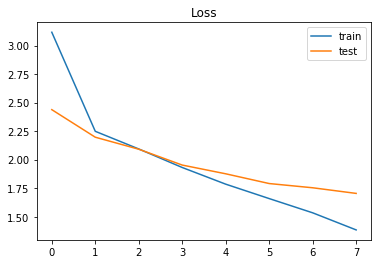

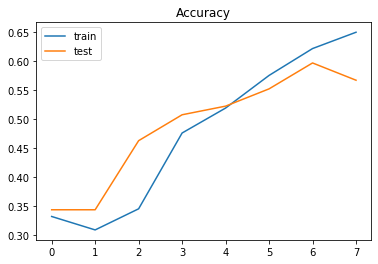

In [9]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

**Results Summary:**
_Provide a brief summary of results obtained like model accuracy & other insights based on EDA & your interpretations_
1. Based on EDA we have 1162 data point(documents) in which 417 does not have description i.e description is null and 765 documents have description. These 745 documents have 27 unique departments and Ticketing is having most number of documents among all the 27 departments i.e 200 documents and Marine Service Steward is having least documents among all 27 departments 
2. By applying Neural network we have obtained 54% accuray it can be improved by tuning the hyperparameters  
3. Accuracy graph has been ploted above suggest that we have almost same behaviour for training and testing data set.